In [ ]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'solar system orbit radius versus orbit period')

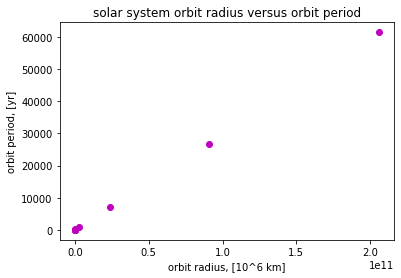

In [ ]:
keplerdata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/planetarydata.txt")
r = keplerdata[:,0]
r3 = r**3
T = keplerdata[:,1]
T2 = T**2
N = r.size

plt.plot( r3, T2, 'mo')
plt.xlabel("orbit radius, [10^6 km]^3")
plt.ylabel("orbit period, [yr]^2")
plt.title('solar system orbit radius versus orbit period')

In [ ]:
M = np.column_stack( (r3,np.ones(N)))             # Nx2 matrix 
MTM = np.dot( M.transpose(), M)                  # 2xN matrix 
MTMINV = np.linalg.inv(MTM)                      # 2x2 matrx
MTY = np.dot(M.transpose(),T2)                    # 2-element vector

print(MTY)
print(MTM)
print(MTMINV)

[1.52691092e+16 9.62987525e+04]
[[5.12765140e+22 3.24073917e+11]
 [3.24073917e+11 9.00000000e+00]]
[[ 2.52479402e-23 -9.09133207e-13]
 [-9.09133207e-13  1.43847373e-01]]


In [ ]:
print("r^3 = ",r3)
print("T^2 = ",T2)
print("M = ",M)

r^3 =  [1.94104539e+05 1.26672337e+06 3.34807194e+06 1.18367636e+07
 4.72001304e+08 3.00780976e+09 2.37017336e+10 9.08276490e+10
 2.06048077e+11]
T^2 =  [5.80810000e-02 3.78225000e-01 1.00000000e+00 3.53440000e+00
 1.40659600e+02 8.65536400e+02 7.01406250e+03 2.68042384e+04
 6.14692849e+04]
M =  [[1.94104539e+05 1.00000000e+00]
 [1.26672337e+06 1.00000000e+00]
 [3.34807194e+06 1.00000000e+00]
 [1.18367636e+07 1.00000000e+00]
 [4.72001304e+08 1.00000000e+00]
 [3.00780976e+09 1.00000000e+00]
 [2.37017336e+10 1.00000000e+00]
 [9.08276490e+10 1.00000000e+00]
 [2.06048077e+11 1.00000000e+00]]


In [ ]:
pars = np.dot(MTMINV,MTY)
print(pars)
m, c = pars[0], pars[1]

m *= (3.15e7)**2/(1.e9)**3 # convert to [s^2/m^3]
G = 6.674e-11 # grav. constant m^3 kg^-1 s^-2
Msun = 4.*np.pi**2/G/m
print('mass of sun [kg] ', Msun)

[ 2.97965161e-07 -2.93315978e+01]
mass of sun [kg]  2.0007228772837068e+30


mass of sun [kg]  2.0007228772837068e+30


In [ ]:
var =  1. / (N-2) * np.sum(( T2 - pars[0]*r3 - pars[1] )*( T2 - pars[0]*r3 - pars[1] ))
covs = MTMINV*var
print(var, np.sqrt(var))
print(covs)

9746.34143031306 98.72356066468156
[[ 2.46075046e-19 -8.86072265e-09]
 [-8.86072265e-09  1.40198561e+03]]


Text(0.5, 1.0, 'planet orbital period versus orbital radius')

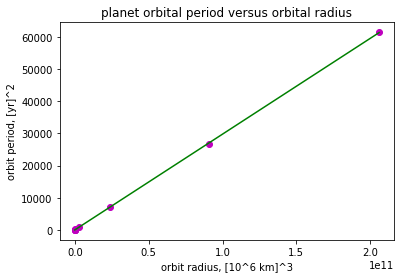

In [ ]:
plt.plot(r3, T2,'mo')
T2fit = np.dot(M,pars)
plt.plot(r3,T2fit,"g-")
plt.xlabel("orbit radius, [10^6 km]^3")
plt.ylabel("orbit period, [yr]^2")
plt.title('planet orbital period versus orbital radius')